# METODY EKSPLORACJI DANYCH
# Laboratorium. Klasyfikacja na podstawie najbliższego sąsiedztwa

#### Wczytanie bibliotek oraz danych

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
cereals = pd.read_excel('C://Users//Domin//Desktop//semestr5//MED//Lab1//LAB4//cereals.xlsx')

# Zamiana wartości 'N' na 0 i 'T' na 1 w kolumnie 'srodk_polka'
cereals['srodk_polka'] = cereals['srodk_polka'].replace({'N': 0, 'T': 1})

cereals

C:\Users\Domin\AppData\Local\Temp\ipykernel_5596\3377274474.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cereals['srodk_polka'] = cereals['srodk_polka'].replace({'N': 0, 'T': 1})


,nazwa,producent,kalorie,cukry,weglowodany,proteiny,tluszcz,sod,blonnik,potas,Liczba_polek,srodk_polka,polka_1,polka_2,polka_3
0,100%_Bran,N,70,6,5.0,4,1,130,10.0,280,3,0,0,0,1
1,100%_Natural_Bran,Q,120,8,8.0,3,5,15,2.0,135,3,0,0,0,1
2,All-Bran,K,70,5,7.0,4,1,260,9.0,320,3,0,0,0,1
3,All-Bran_with_Extra_Fiber,K,50,0,8.0,4,0,140,14.0,330,3,0,0,0,1
4,Almond_Delight,R,110,8,14.0,2,2,200,1.0,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,110,3,21.0,2,1,250,0.0,60,3,0,0,0,1
73,Trix,G,110,12,13.0,1,1,140,0.0,25,2,1,0,1,0
74,Wheat_Chex,R,100,3,17.0,3,1,230,3.0,115,1,0,1,0,0
75,Wheaties,G,100,3,17.0,3,1,200,3.0,110,1,0,1,0,0


array([[<Axes: xlabel='kalorie', ylabel='kalorie'>,
        <Axes: xlabel='cukry', ylabel='kalorie'>,
        <Axes: xlabel='weglowodany', ylabel='kalorie'>,
        <Axes: xlabel='proteiny', ylabel='kalorie'>,
        <Axes: xlabel='tluszcz', ylabel='kalorie'>,
        <Axes: xlabel='sod', ylabel='kalorie'>,
        <Axes: xlabel='blonnik', ylabel='kalorie'>,
        <Axes: xlabel='potas', ylabel='kalorie'>,
        <Axes: xlabel='Liczba_polek', ylabel='kalorie'>,
        <Axes: xlabel='srodk_polka', ylabel='kalorie'>,
        <Axes: xlabel='polka_1', ylabel='kalorie'>,
        <Axes: xlabel='polka_2', ylabel='kalorie'>,
        <Axes: xlabel='polka_3', ylabel='kalorie'>],
       [<Axes: xlabel='kalorie', ylabel='cukry'>,
        <Axes: xlabel='cukry', ylabel='cukry'>,
        <Axes: xlabel='weglowodany', ylabel='cukry'>,
        <Axes: xlabel='proteiny', ylabel='cukry'>,
        <Axes: xlabel='tluszcz', ylabel='cukry'>,
        <Axes: xlabel='sod', ylabel='cukry'>,
        <Axes: xla

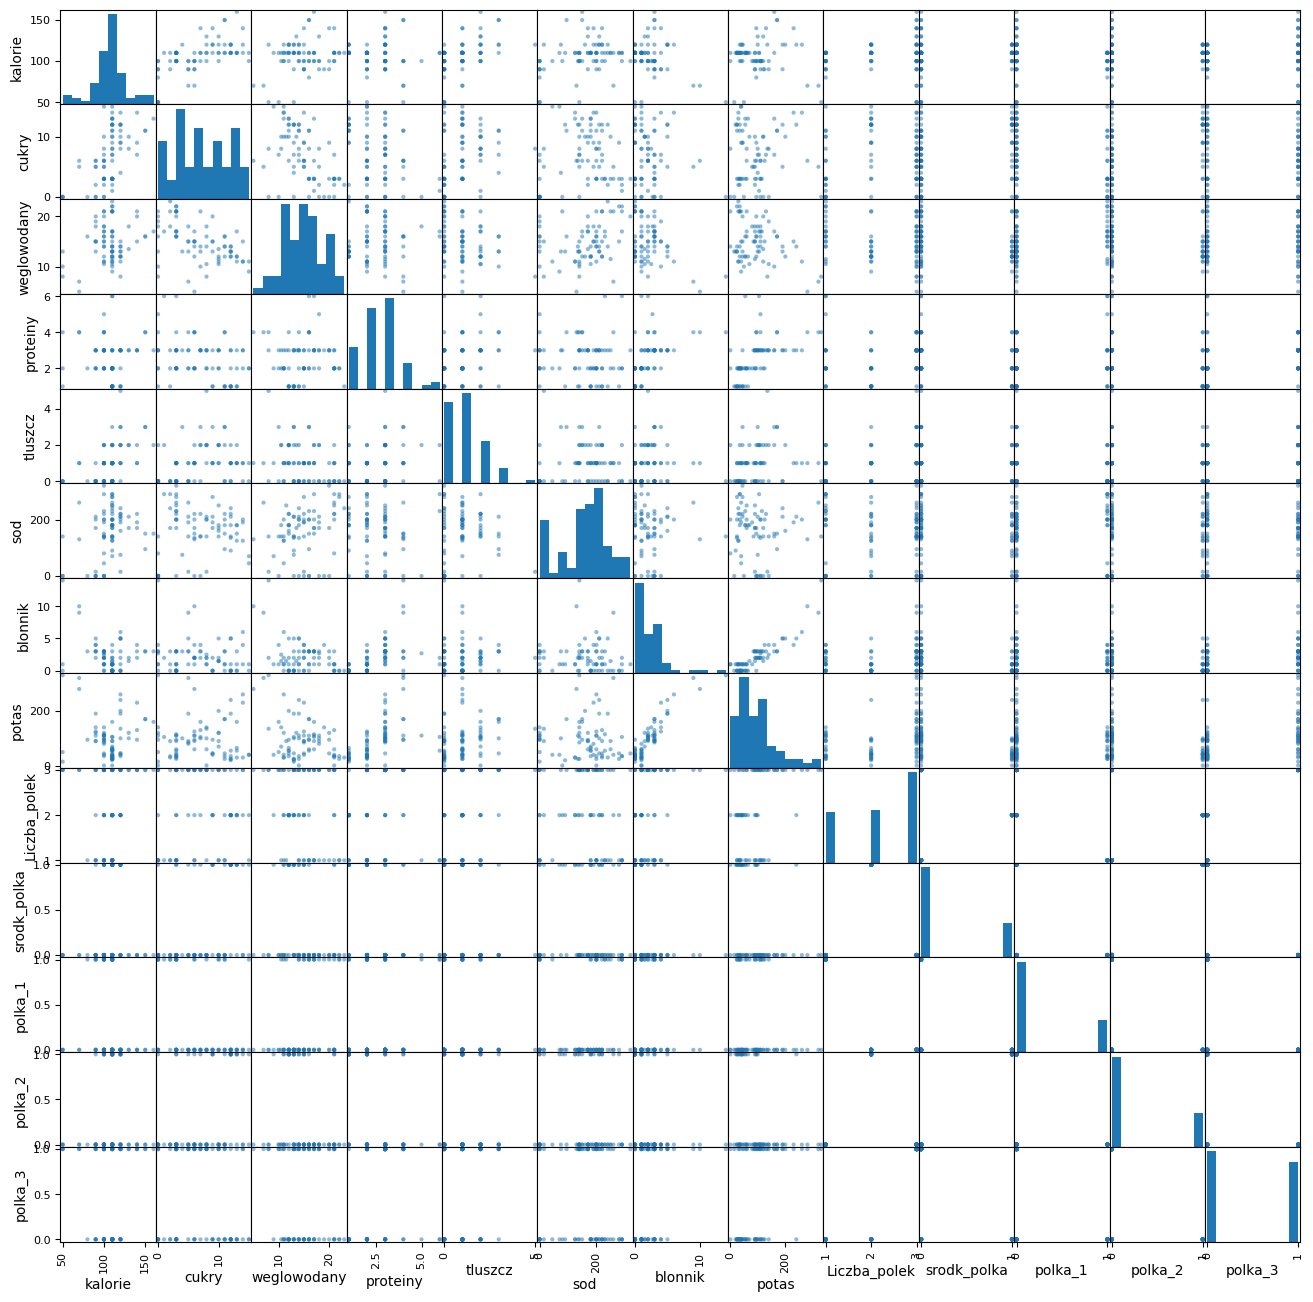

In [5]:
scatter_matrix(cereals, figsize=(16, 16))

## Klasyfikacja płatków ze względu na zdrowotność

In [70]:
skladniki = ['blonnik', 'cukry', 'tluszcz', 'proteiny']  # Błonnik, Cukry, Tłuszcze

decyzja = 'klasa_zdrowotnosci'  # Klasa zdrowotności, którą dodamy

data = cereals.copy()


In [71]:
data[['blonnik', 'cukry', 'tluszcz', 'proteiny']].describe()

,blonnik,cukry,tluszcz,proteiny
count,77.000000,77.000000,77.000000,77.000000
mean,2.151948,6.935065,1.012987,2.545455
std,2.383364,4.422840,1.006473,1.094790
min,0.000000,0.000000,0.000000,1.000000
25%,1.000000,3.000000,0.000000,2.000000
50%,2.000000,7.000000,1.000000,3.000000
75%,3.000000,11.000000,2.000000,3.000000
max,14.000000,15.000000,5.000000,6.000000


In [36]:
data[['blonnik', 'cukry', 'tluszcz', 'proteiny']].quantile([0.25, 0.5, 0.75])

,blonnik,cukry,tluszcz,proteiny
0.25,1.0,3.0,0.0,2.0
0.50,2.0,7.0,1.0,3.0
0.75,3.0,11.0,2.0,3.0


In [72]:
# Definiowanie klas zdrowotności na podstawie wartości odżywczych

def classify_health(row):
    if row['blonnik'] >= 2.0 and row['cukry'] <= 8.0 and row['tluszcz'] <= 1.0 and row['proteiny'] >= 2.0:
        return 'Zdrowe'
    else :
        return 'Niezdrowe'



data[decyzja] = data.apply(classify_health, axis=1)

class_mapping = {'Zdrowe': 0, 'Niezdrowe': 1}
data[decyzja] = data[decyzja].map(class_mapping)
data[decyzja].value_counts()


klasa_zdrowotnosci
1    58
0    19
Name: count, dtype: int64

              precision    recall  f1-score    support
Zdrowe         1.000000  0.714286  0.833333   7.000000
Niezdrowe      0.894737  1.000000  0.944444  17.000000
accuracy       0.916667  0.916667  0.916667   0.916667
macro avg      0.947368  0.857143  0.888889  24.000000
weighted avg   0.925439  0.916667  0.912037  24.000000


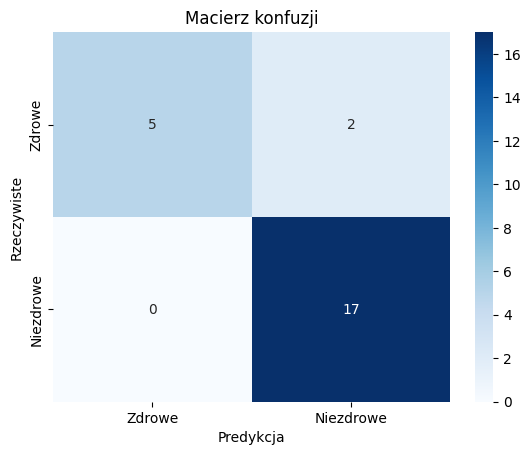

In [74]:
x = data[skladniki]
y = data[decyzja]

# Normalizacja danych
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# Podział na zbiory treningowe i testowe
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

# Tworzenie i trenowanie klasyfikatora KNN
k = 3  # Liczba sąsiadów
knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn.fit(x_train, y_train)

# Predykcja na zbiorze testowym
y_pred = knn.predict(x_test)


# Ocena modelu
report_dict = classification_report(y_test, y_pred, target_names=['Zdrowe', 'Niezdrowe'], output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()

print(report_df)

# Obliczenie macierzy konfuzji
cm = confusion_matrix(y_test, y_pred)

# Wyciąganie metryk dla każdej klasy
precision = report_df['precision'][:-3]
recall = report_df['recall'][:-3]
f1_score = report_df['f1-score'][:-3]

# Wizualizacja
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Zdrowe', 'Niezdrowe'], yticklabels=['Zdrowe', 'Niezdrowe'])
plt.xlabel('Predykcja')
plt.ylabel('Rzeczywiste')
plt.title('Macierz konfuzji')
plt.show()

## Klasyfikacja półek ze względu na potas

Dokładność modelu: 0.5625

Raport klasyfikacji:
               precision    recall  f1-score   support

           1       0.33      0.50      0.40         2
           2       0.60      0.43      0.50         7
           3       0.62      0.71      0.67         7

    accuracy                           0.56        16
   macro avg       0.52      0.55      0.52        16
weighted avg       0.58      0.56      0.56        16



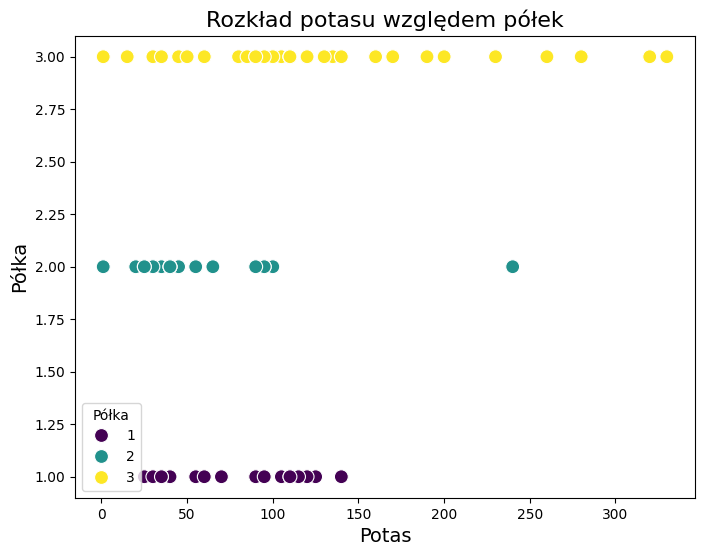

In [34]:
# Przygotowanie danych
x2 = cereals[['potas']]  # Cecha: potas
y2 = cereals['Liczba_polek']  # Decyzja: półka

# Podział na zbiór treningowy i testowy
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

# Standaryzacja danych
scaler2 = StandardScaler()
x2_train_scaled = scaler2.fit_transform(x2_train)
x2_test_scaled = scaler2.transform(x2_test)

# Trening modelu kNN
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x2_train_scaled, y2_train)

# Predykcja
y2_pred = knn.predict(x2_test_scaled)

# Ocena modelu
accuracy2 = accuracy_score(y2_test, y2_pred)
classification_rep2 = classification_report(y2_test, y2_pred)

print("Dokładność modelu:", accuracy2)
print("\nRaport klasyfikacji:\n", classification_rep2)

x3=cereals[['potas']].values.flatten()
y3=cereals['Liczba_polek'].values.flatten()

# Wykres rozkładu potasu w zależności od półki
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x3, y=y3, hue=cereals['Liczba_polek'], palette="viridis", s=100)
plt.title("Rozkład potasu względem półek", fontsize=16)
plt.xlabel("Potas", fontsize=14)
plt.ylabel("Półka", fontsize=14)
plt.legend(title="Półka")
plt.show()



Porównanie rzeczywistych i przewidywanych etykiet:

    Rzeczywista półka  Przewidywana półka
0                   3                   2
1                   2                   2
2                   2                   1
3                   3                   3
4                   3                   3
5                   1                   3
6                   2                   2
7                   3                   2
8                   3                   3
9                   3                   3
10                  2                   3
11                  1                   1
12                  2                   1
13                  2                   2
14                  2                   3
15                  3                   3


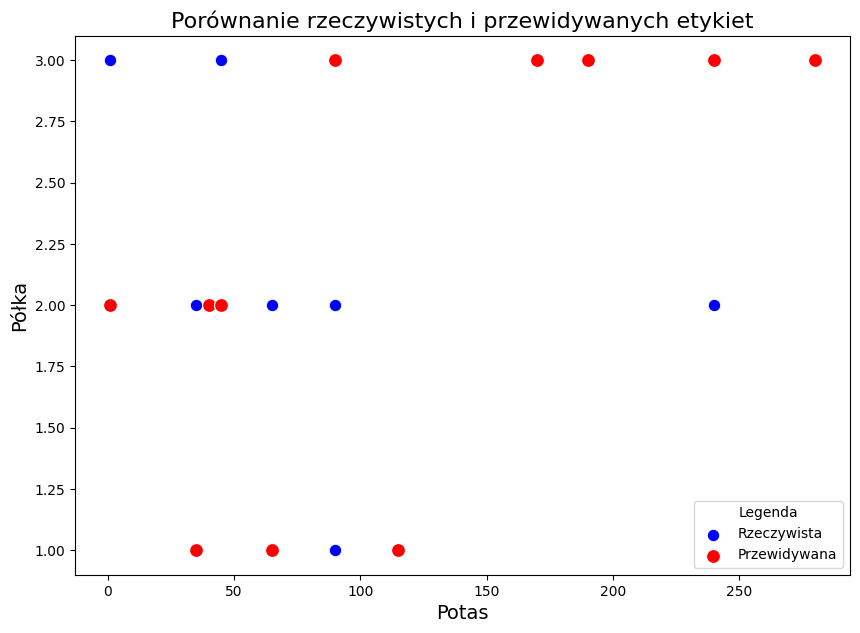

In [66]:
# Porównanie rzeczywistych i przewidywanych etykiet
results = pd.DataFrame({
    "Rzeczywista półka": y2_test.values,
    "Przewidywana półka": y2_pred
}).reset_index(drop=True)

print("Porównanie rzeczywistych i przewidywanych etykiet:\n")
print(results)

# Dodanie klasyfikacji do wizualizacji
x3_test = x2_test.values.flatten()
y3_pred = y2_pred

plt.figure(figsize=(10, 7))
sns.scatterplot(x=x3_test, y=y2_test, color="blue", label="Rzeczywista", s=80)
sns.scatterplot(x=x3_test, y=y3_pred, color="red", label="Przewidywana", s=100)
plt.title("Porównanie rzeczywistych i przewidywanych etykiet", fontsize=16)
plt.xlabel("Potas", fontsize=14)
plt.ylabel("Półka", fontsize=14)
plt.legend(title="Legenda")
plt.show()

## Klasyfikacja półek ze względu na cukry

Dokładność modelu: 0.6875

Raport klasyfikacji:
               precision    recall  f1-score   support

           1       0.67      0.40      0.50         5
           2       1.00      0.67      0.80         3
           3       0.64      0.88      0.74         8

    accuracy                           0.69        16
   macro avg       0.77      0.65      0.68        16
weighted avg       0.71      0.69      0.67        16



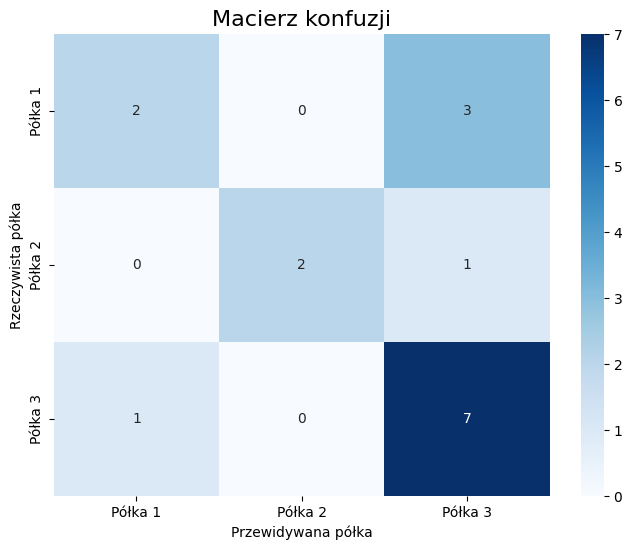

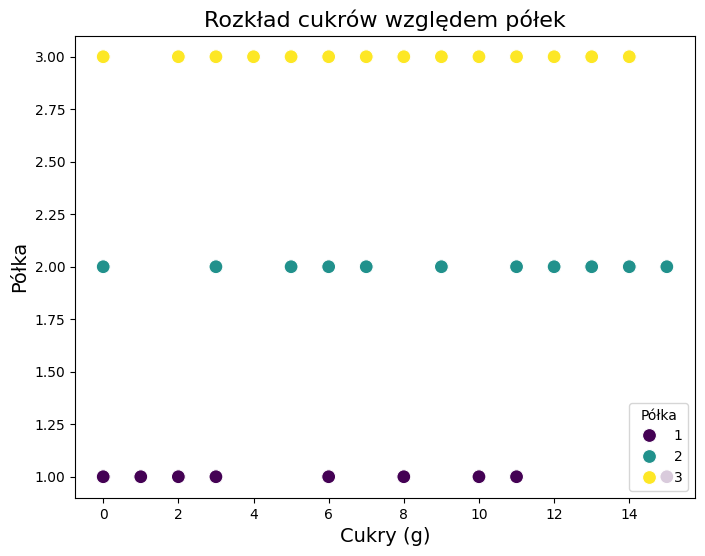

In [75]:
x4 = cereals[['cukry']]
y4 = cereals['Liczba_polek']

# Podział na zbiór treningowy i testowy
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.2, random_state=13)

# Standaryzacja danych
scaler4 = StandardScaler()
x4_train_scaled = scaler4.fit_transform(x4_train)
x4_test_scaled = scaler4.transform(x4_test)

# Trening modelu kNN
knn4 = KNeighborsClassifier(n_neighbors=5)
knn4.fit(x4_train_scaled, y4_train)

y4_pred = knn4.predict(x4_test_scaled)

# Ocena modelu
accuracy4 = accuracy_score(y4_test, y4_pred)
classification_rep4 = classification_report(y4_test, y4_pred)

# Wyświetlenie dokładności i raportu klasyfikacji
print("Dokładność modelu:", accuracy4)
print("\nRaport klasyfikacji:\n", classification_rep4)

# Macierz pomyłek
conf_matrix4 = confusion_matrix(y4_test, y4_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix4, annot=True, fmt="d", cmap="Blues", xticklabels=['Półka 1', 'Półka 2', 'Półka 3'], yticklabels=['Półka 1', 'Półka 2', 'Półka 3'])
plt.title("Macierz konfuzji", fontsize=16)
plt.xlabel("Przewidywana półka")
plt.ylabel("Rzeczywista półka")
plt.show()

# Wizualizacja rozkładu cukrów w zależności od półek
plt.figure(figsize=(8, 6))
sns.scatterplot(x='cukry', y='Liczba_polek', data=cereals, hue='Liczba_polek', palette="viridis", s=100)
plt.title("Rozkład cukrów względem półek", fontsize=16)
plt.xlabel("Cukry (g)", fontsize=14)
plt.ylabel("Półka", fontsize=14)
plt.legend(title="Półka")
plt.show()